In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2022-10-09 05:24:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0s      

2022-10-09 05:24:09 (165 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [3]:
tokenizer = Tokenizer()

#data = open('/tmp/irish-lyrics-eof.txt').read()
data = open('dd.txt').read()

corpus = data.lower().split("\n")
print(len(corpus))

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


347
{'the': 1, 'a': 2, 'to': 3, 'of': 4, 'and': 5, 'is': 6, 'in': 7, 'party': 8, 'are': 9, 'has': 10, 'an': 11, 'they': 12, 'it': 13, 'that': 14, 'by': 15, 'from': 16, 'his': 17, 'their': 18, 'for': 19, 'with': 20, 'on': 21, 'town': 22, 'pcs': 23, 'but': 24, 'be': 25, 'have': 26, 'been': 27, 'city': 28, 'into': 29, 'must': 30, 'find': 31, 'all': 32, 'as': 33, 'who': 34, 'out': 35, 'or': 36, 'will': 37, 'if': 38, 'them': 39, 'one': 40, 'you': 41, 'group': 42, 'he': 43, 'powerful': 44, 'dragon': 45, 'your': 46, 'sent': 47, 'not': 48, 'local': 49, 'being': 50, 'him': 51, 'can': 52, 'players': 53, 'characters': 54, 'after': 55, 'village': 56, 'when': 57, 'magic': 58, 'only': 59, 'at': 60, 'member': 61, 'what': 62, 'her': 63, 'up': 64, 'small': 65, 'large': 66, 'dead': 67, 'while': 68, 'people': 69, 'monsters': 70, 'help': 71, 'was': 72, 'good': 73, 'where': 74, 'kill': 75, 'area': 76, 'each': 77, 'some': 78, 'its': 79, 'actually': 80, 'evil': 81, 'wants': 82, 'which': 83, 'no': 84, 'this':

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
#print(tokenizer.word_index['athy'])
#print(tokenizer.word_index['one'])
#print(tokenizer.word_index['jeremy'])
#print(tokenizer.word_index['lanigan'])

7
1
22
4


In [ ]:
print(xs[6])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 912 194   4   1 195   6 163]


In [ ]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 912 194   4   1 195   6]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'the': 1, 'a': 2, 'to': 3, 'of': 4, 'and': 5, 'is': 6, 'in': 7, 'party': 8, 'are': 9, 'has': 10, 'an': 11, 'they': 12, 'it': 13, 'that': 14, 'by': 15, 'from': 16, 'his': 17, 'their': 18, 'for': 19, 'with': 20, 'on': 21, 'town': 22, 'pcs': 23, 'but': 24, 'be': 25, 'have': 26, 'been': 27, 'city': 28, 'into': 29, 'must': 30, 'find': 31, 'all': 32, 'as': 33, 'who': 34, 'out': 35, 'or': 36, 'will': 37, 'if': 38, 'them': 39, 'one': 40, 'you': 41, 'group': 42, 'he': 43, 'powerful': 44, 'dragon': 45, 'your': 46, 'sent': 47, 'not': 48, 'local': 49, 'being': 50, 'him': 51, 'can': 52, 'players': 53, 'characters': 54, 'after': 55, 'village': 56, 'when': 57, 'magic': 58, 'only': 59, 'at': 60, 'member': 61, 'what': 62, 'her': 63, 'up': 64, 'small': 65, 'large': 66, 'dead': 67, 'while': 68, 'people': 69, 'monsters': 70, 'help': 71, 'was': 72, 'good': 73, 'where': 74, 'kill': 75, 'area': 76, 'each': 77, 'some': 78, 'its': 79, 'actually': 80, 'evil': 81, 'wants': 82, 'which': 83, 'no': 84, 'this': 85,

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('accuracy')>0.93):
			print("\nReached 93% accuracy so cancelling training!")
			self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
#history = model.fit(xs, ys, epochs=100, verbose=1)
print(model.summary())
#print(model)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 97, 100)           237100    
                                                                 
 bidirectional_2 (Bidirectio  (None, 300)              301200    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 2371)              713671    
                                                                 
Total params: 1,251,971
Trainable params: 1,251,971
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(xs, ys, epochs=100, verbose=1, callbacks=[callbacks])

Epoch 1/100
266/266 [==============================] - 7s 15ms/step - loss: 6.7975 - accuracy: 0.0575
Epoch 2/100
266/266 [==============================] - 4s 14ms/step - loss: 5.8214 - accuracy: 0.1074
Epoch 3/100
266/266 [==============================] - 4s 14ms/step - loss: 5.0164 - accuracy: 0.1578
Epoch 4/100
266/266 [==============================] - 4s 14ms/step - loss: 4.0397 - accuracy: 0.2269
Epoch 5/100
266/266 [==============================] - 4s 14ms/step - loss: 3.0344 - accuracy: 0.3474
Epoch 6/100
266/266 [==============================] - 4s 14ms/step - loss: 2.1558 - accuracy: 0.5011
Epoch 7/100
266/266 [==============================] - 4s 15ms/step - loss: 1.5206 - accuracy: 0.6323
Epoch 8/100
266/266 [==============================] - 4s 15ms/step - loss: 1.0605 - accuracy: 0.7471
Epoch 9/100
266/266 [==============================] - 4s 15ms/step - loss: 0.7146 - accuracy: 0.8344
Epoch 10/100
266/266 [==============================] - 4s 15ms/step - loss: 0.500

In [ ]:
model2 = Sequential()
model2.add(Embedding(total_words, 240, input_length=max_sequence_len-1))
model2.add(Bidirectional(LSTM(150, return_sequences = True)))
#model2.add(Dropout(0.2))
model2.add(LSTM(100))
model2.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(total_words, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 97, 240)           569040    
                                                                 
 bidirectional_3 (Bidirectio  (None, 97, 300)          469200    
 nal)                                                            
                                                                 
 lstm_5 (LSTM)               (None, 100)               160400    
                                                                 
 dense_4 (Dense)             (None, 1185)              119685    
                                                                 
 dense_5 (Dense)             (None, 2371)              2812006   
                                                                 
Total params: 4,130,331
Trainable params: 4,130,331
Non-trainable params: 0
____________________________________________

In [ ]:
history2 = model2.fit(xs, ys, epochs=300, verbose=1, callbacks=[callbacks])

Epoch 1/300
266/266 [==============================] - 9s 19ms/step - loss: 6.8624 - accuracy: 0.0595
Epoch 2/300
266/266 [==============================] - 5s 19ms/step - loss: 6.1869 - accuracy: 0.0668
Epoch 3/300
266/266 [==============================] - 5s 19ms/step - loss: 5.9604 - accuracy: 0.0727
Epoch 4/300
266/266 [==============================] - 5s 18ms/step - loss: 5.8295 - accuracy: 0.0800
Epoch 5/300
266/266 [==============================] - 5s 19ms/step - loss: 5.7023 - accuracy: 0.0845
Epoch 6/300
266/266 [==============================] - 5s 18ms/step - loss: 5.5589 - accuracy: 0.0933
Epoch 7/300
266/266 [==============================] - 5s 18ms/step - loss: 5.4295 - accuracy: 0.1093
Epoch 8/300
266/266 [==============================] - 5s 19ms/step - loss: 5.3227 - accuracy: 0.1160
Epoch 9/300
266/266 [==============================] - 5s 19ms/step - loss: 5.2314 - accuracy: 0.1217
Epoch 10/300
266/266 [==============================] - 5s 19ms/step - loss: 5.129

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

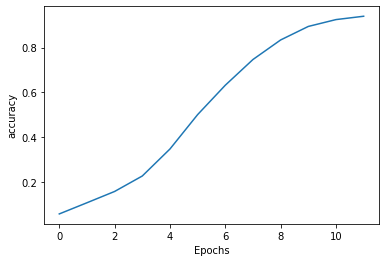

In [ ]:
plot_graphs(history, 'accuracy')

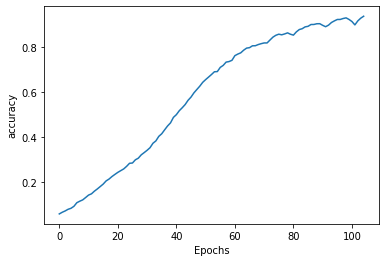

In [ ]:
plot_graphs(history2, 'accuracy')

In [27]:
#@title Preambulo inicial
seed_text = "The god of sun came to the earth to help the inca empire" #@param {type:"string"}
next_words = 22 #@param {type:"number"}


In [6]:
model = load_model('tgddv2.h5')
model2 = load_model('tgdd2v2.h5')

# Modelo 1

In [28]:
res_text = seed_text
#next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([res_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	res_text += " " + output_word
print(res_text)

The god of sun came to the earth to help the inca empire country city it is being held under siege by monsters possibly voadkyn these voadkyn wish “the sacred” if the sacred” is returned


# Modelo 2

In [29]:
res_text = seed_text
#next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([res_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model2.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	res_text += " " + output_word
print(res_text)

The god of sun came to the earth to help the inca empire temple up adventurers with adventurers when what they win to bring them an imperial city for if peace from an evil magical


In [ ]:
#model.save('tgddv2.h5')
#model2.save('tgdd2v2.h5')